In [1]:
# from __future__ import print_function
# import pyspark
# findspark.find()
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler,VectorIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [2]:
# import findspark
# findspark.init()
# findspark.find()

In [3]:
spark = SparkSession.builder.appName("Pyspark ML Algorithms").getOrCreate()

In [4]:
dataframe = spark.read.csv("Admission_Predict.csv",header=True)

In [128]:
type (dataframe), dataframe.count()

(pyspark.sql.dataframe.DataFrame, 400)

In [6]:
dataframe.show()

+---------+-----------+-----------------+---+----+----+--------+----------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+---------+-----------+-----------------+---+----+----+--------+----------------+
|      337|        118|                4|4.5| 4.5|9.65|       1|            0.92|
|      324|        107|                4|  4| 4.5|8.87|       1|            0.76|
|      316|        104|                3|  3| 3.5|   8|       1|            0.72|
|      322|        110|                3|3.5| 2.5|8.67|       1|             0.8|
|      314|        103|                2|  2|   3|8.21|       0|            0.65|
|      330|        115|                5|4.5|   3|9.34|       1|             0.9|
|      321|        109|                3|  3|   4| 8.2|       1|            0.75|
|      308|        101|                2|  3|   4| 7.9|       0|            0.68|
|      302|        102|                1|  2| 1.5|   8|       0|             0.5|
|     NULL|     

In [7]:
dataframe.printSchema()

root
 |-- GRE Score: string (nullable = true)
 |-- TOEFL Score: string (nullable = true)
 |-- University Rating: string (nullable = true)
 |-- SOP: string (nullable = true)
 |-- LOR : string (nullable = true)
 |-- CGPA: string (nullable = true)
 |-- Research: string (nullable = true)
 |-- Chance of Admit : string (nullable = true)



In [8]:
dataframe.columns

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [9]:
from pyspark.sql.functions import col

for c in dataframe.columns:
    print(col(c))

Column<'GRE Score'>
Column<'TOEFL Score'>
Column<'University Rating'>
Column<'SOP'>
Column<'LOR '>
Column<'CGPA'>
Column<'Research'>
Column<'Chance of Admit '>


In [10]:
[col(c) for c in dataframe.columns]

[Column<'GRE Score'>,
 Column<'TOEFL Score'>,
 Column<'University Rating'>,
 Column<'SOP'>,
 Column<'LOR '>,
 Column<'CGPA'>,
 Column<'Research'>,
 Column<'Chance of Admit '>]

In [11]:
dataframe.select(*(col(c) for c in dataframe.columns)).show()
# unpacking -> dataframe.select(col("GRE Score"), col("TOEFL Score"), col....).show()

+---------+-----------+-----------------+---+----+----+--------+----------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+---------+-----------+-----------------+---+----+----+--------+----------------+
|      337|        118|                4|4.5| 4.5|9.65|       1|            0.92|
|      324|        107|                4|  4| 4.5|8.87|       1|            0.76|
|      316|        104|                3|  3| 3.5|   8|       1|            0.72|
|      322|        110|                3|3.5| 2.5|8.67|       1|             0.8|
|      314|        103|                2|  2|   3|8.21|       0|            0.65|
|      330|        115|                5|4.5|   3|9.34|       1|             0.9|
|      321|        109|                3|  3|   4| 8.2|       1|            0.75|
|      308|        101|                2|  3|   4| 7.9|       0|            0.68|
|      302|        102|                1|  2| 1.5|   8|       0|             0.5|
|     NULL|     

In [12]:
dataframe.select([col(c) for c in dataframe.columns]).show()

+---------+-----------+-----------------+---+----+----+--------+----------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+---------+-----------+-----------------+---+----+----+--------+----------------+
|      337|        118|                4|4.5| 4.5|9.65|       1|            0.92|
|      324|        107|                4|  4| 4.5|8.87|       1|            0.76|
|      316|        104|                3|  3| 3.5|   8|       1|            0.72|
|      322|        110|                3|3.5| 2.5|8.67|       1|             0.8|
|      314|        103|                2|  2|   3|8.21|       0|            0.65|
|      330|        115|                5|4.5|   3|9.34|       1|             0.9|
|      321|        109|                3|  3|   4| 8.2|       1|            0.75|
|      308|        101|                2|  3|   4| 7.9|       0|            0.68|
|      302|        102|                1|  2| 1.5|   8|       0|             0.5|
|     NULL|     

In [13]:
[col(c).cast("float").alias(c) for c in dataframe.columns]

[Column<'CAST(GRE Score AS FLOAT) AS `GRE Score`'>,
 Column<'CAST(TOEFL Score AS FLOAT) AS `TOEFL Score`'>,
 Column<'CAST(University Rating AS FLOAT) AS `University Rating`'>,
 Column<'CAST(SOP AS FLOAT) AS SOP'>,
 Column<'CAST(LOR  AS FLOAT) AS `LOR `'>,
 Column<'CAST(CGPA AS FLOAT) AS CGPA'>,
 Column<'CAST(Research AS FLOAT) AS Research'>,
 Column<'CAST(Chance of Admit  AS FLOAT) AS `Chance of Admit `'>]

In [14]:
dataframe.select([col(c).cast("float").alias(c) for c in dataframe.columns]).show()

+---------+-----------+-----------------+---+----+----+--------+----------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+---------+-----------+-----------------+---+----+----+--------+----------------+
|    337.0|      118.0|              4.0|4.5| 4.5|9.65|     1.0|            0.92|
|    324.0|      107.0|              4.0|4.0| 4.5|8.87|     1.0|            0.76|
|    316.0|      104.0|              3.0|3.0| 3.5| 8.0|     1.0|            0.72|
|    322.0|      110.0|              3.0|3.5| 2.5|8.67|     1.0|             0.8|
|    314.0|      103.0|              2.0|2.0| 3.0|8.21|     0.0|            0.65|
|    330.0|      115.0|              5.0|4.5| 3.0|9.34|     1.0|             0.9|
|    321.0|      109.0|              3.0|3.0| 4.0| 8.2|     1.0|            0.75|
|    308.0|      101.0|              2.0|3.0| 4.0| 7.9|     0.0|            0.68|
|    302.0|      102.0|              1.0|2.0| 1.5| 8.0|     0.0|             0.5|
|     NULL|     

In [15]:
new_dataframe = dataframe.select(*(col(c).cast("float").alias(c) for c in dataframe.columns))
new_dataframe.printSchema()

root
 |-- GRE Score: float (nullable = true)
 |-- TOEFL Score: float (nullable = true)
 |-- University Rating: float (nullable = true)
 |-- SOP: float (nullable = true)
 |-- LOR : float (nullable = true)
 |-- CGPA: float (nullable = true)
 |-- Research: float (nullable = true)
 |-- Chance of Admit : float (nullable = true)



In [16]:
new_dataframe = dataframe.select([col(c).cast("float").alias(c) for c in dataframe.columns])

In [17]:
new_dataframe.printSchema()

root
 |-- GRE Score: float (nullable = true)
 |-- TOEFL Score: float (nullable = true)
 |-- University Rating: float (nullable = true)
 |-- SOP: float (nullable = true)
 |-- LOR : float (nullable = true)
 |-- CGPA: float (nullable = true)
 |-- Research: float (nullable = true)
 |-- Chance of Admit : float (nullable = true)



In [18]:
from pyspark.sql.functions import col, count, isnan, when

In [19]:
for c in new_dataframe.columns:
    print(c)

GRE Score
TOEFL Score
University Rating
SOP
LOR 
CGPA
Research
Chance of Admit 


In [20]:
# help(when)

    when   
    Parameters
    ----------
    condition : :class:`~pyspark.sql.Column`
        a boolean :class:`~pyspark.sql.Column` expression.
    value :
        a literal value, or a :class:`~pyspark.sql.Column` expression.

In [21]:
[count(when(col(c)==None,c)).alias(f"{c}_Null") for c in new_dataframe.columns]

[Column<'count(CASE WHEN (GRE Score = NULL) THEN GRE Score END) AS `GRE Score_Null`'>,
 Column<'count(CASE WHEN (TOEFL Score = NULL) THEN TOEFL Score END) AS `TOEFL Score_Null`'>,
 Column<'count(CASE WHEN (University Rating = NULL) THEN University Rating END) AS `University Rating_Null`'>,
 Column<'count(CASE WHEN (SOP = NULL) THEN SOP END) AS SOP_Null'>,
 Column<'count(CASE WHEN (LOR  = NULL) THEN LOR  END) AS `LOR _Null`'>,
 Column<'count(CASE WHEN (CGPA = NULL) THEN CGPA END) AS CGPA_Null'>,
 Column<'count(CASE WHEN (Research = NULL) THEN Research END) AS Research_Null'>,
 Column<'count(CASE WHEN (Chance of Admit  = NULL) THEN Chance of Admit  END) AS `Chance of Admit _Null`'>]

In [22]:
[count(when(col(c).isNull(),c)).alias(f"{c}_Null") for c in new_dataframe.columns]

[Column<'count(CASE WHEN (GRE Score IS NULL) THEN GRE Score END) AS `GRE Score_Null`'>,
 Column<'count(CASE WHEN (TOEFL Score IS NULL) THEN TOEFL Score END) AS `TOEFL Score_Null`'>,
 Column<'count(CASE WHEN (University Rating IS NULL) THEN University Rating END) AS `University Rating_Null`'>,
 Column<'count(CASE WHEN (SOP IS NULL) THEN SOP END) AS SOP_Null'>,
 Column<'count(CASE WHEN (LOR  IS NULL) THEN LOR  END) AS `LOR _Null`'>,
 Column<'count(CASE WHEN (CGPA IS NULL) THEN CGPA END) AS CGPA_Null'>,
 Column<'count(CASE WHEN (Research IS NULL) THEN Research END) AS Research_Null'>,
 Column<'count(CASE WHEN (Chance of Admit  IS NULL) THEN Chance of Admit  END) AS `Chance of Admit _Null`'>]

In [23]:
new_dataframe.select([count(when(col(c)==None, c)).alias(f"{c}_Null") for c in new_dataframe.columns]).show() # it cant detect null values

+--------------+----------------+----------------------+--------+---------+---------+-------------+---------------------+
|GRE Score_Null|TOEFL Score_Null|University Rating_Null|SOP_Null|LOR _Null|CGPA_Null|Research_Null|Chance of Admit _Null|
+--------------+----------------+----------------------+--------+---------+---------+-------------+---------------------+
|             0|               0|                     0|       0|        0|        0|            0|                    0|
+--------------+----------------+----------------------+--------+---------+---------+-------------+---------------------+



In [24]:
#checking for null ir nan type values in our columns
new_dataframe.select([count(when(col(c).isNull(), c)).alias(f"{c}_Null") for c in new_dataframe.columns]).show()

+--------------+----------------+----------------------+--------+---------+---------+-------------+---------------------+
|GRE Score_Null|TOEFL Score_Null|University Rating_Null|SOP_Null|LOR _Null|CGPA_Null|Research_Null|Chance of Admit _Null|
+--------------+----------------+----------------------+--------+---------+---------+-------------+---------------------+
|             2|               2|                     0|       0|        0|        0|            0|                    0|
+--------------+----------------+----------------------+--------+---------+---------+-------------+---------------------+



In [25]:
from pyspark.ml.feature import Imputer

In [26]:
# help(Imputer)

In [27]:
imputer = Imputer(inputCols=["GRE Score", "TOEFL Score"],
                  outputCols=["GRE Score", "TOEFL Score"], strategy="mean")
# The default strategy is "mean"
model = imputer.fit(new_dataframe)
imputed_data = model.transform(new_dataframe)

In [28]:
imputed_data.show()

+---------+-----------+-----------------+---+----+----+--------+----------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+---------+-----------+-----------------+---+----+----+--------+----------------+
|    337.0|      118.0|              4.0|4.5| 4.5|9.65|     1.0|            0.92|
|    324.0|      107.0|              4.0|4.0| 4.5|8.87|     1.0|            0.76|
|    316.0|      104.0|              3.0|3.0| 3.5| 8.0|     1.0|            0.72|
|    322.0|      110.0|              3.0|3.5| 2.5|8.67|     1.0|             0.8|
|    314.0|      103.0|              2.0|2.0| 3.0|8.21|     0.0|            0.65|
|    330.0|      115.0|              5.0|4.5| 3.0|9.34|     1.0|             0.9|
|    321.0|      109.0|              3.0|3.0| 4.0| 8.2|     1.0|            0.75|
|    308.0|      101.0|              2.0|3.0| 4.0| 7.9|     0.0|            0.68|
|    302.0|      102.0|              1.0|2.0| 1.5| 8.0|     0.0|             0.5|
|316.77136|     

In [29]:
# checking for null ir nan type values in our columns
imputed_data.select([count(when(col(c).isNull(), c)).alias(c) for c in imputed_data.columns]).show()

+---------+-----------+-----------------+---+----+----+--------+----------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+---------+-----------+-----------------+---+----+----+--------+----------------+
|        0|          0|                0|  0|   0|   0|       0|               0|
+---------+-----------+-----------------+---+----+----+--------+----------------+



In [46]:
imputed_data.columns

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit']

In [51]:
imputed_data = imputed_data.withColumnRenamed("Chance of Admit ", "Chance of Admit")
imputed_data.columns

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit']

In [52]:
features = imputed_data.drop('Chance of Admit')

In [53]:
features.columns

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research']

In [54]:
features.show()

+---------+-----------+-----------------+---+----+----+--------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|
+---------+-----------+-----------------+---+----+----+--------+
|    337.0|      118.0|              4.0|4.5| 4.5|9.65|     1.0|
|    324.0|      107.0|              4.0|4.0| 4.5|8.87|     1.0|
|    316.0|      104.0|              3.0|3.0| 3.5| 8.0|     1.0|
|    322.0|      110.0|              3.0|3.5| 2.5|8.67|     1.0|
|    314.0|      103.0|              2.0|2.0| 3.0|8.21|     0.0|
|    330.0|      115.0|              5.0|4.5| 3.0|9.34|     1.0|
|    321.0|      109.0|              3.0|3.0| 4.0| 8.2|     1.0|
|    308.0|      101.0|              2.0|3.0| 4.0| 7.9|     0.0|
|    302.0|      102.0|              1.0|2.0| 1.5| 8.0|     0.0|
|316.77136|      108.0|              3.0|3.5| 3.0| 8.6|     0.0|
|316.77136|      106.0|              3.0|3.5| 4.0| 8.4|     1.0|
|    327.0|      111.0|              4.0|4.0| 4.5| 9.0|     1.0|
|    328.0| 107.407036|  

## Split

In [57]:
#let's assemble our features together using vectorAssembler
assembler = VectorAssembler(inputCols=features.columns, outputCol="features")

In [58]:
output = assembler.transform(imputed_data)

In [59]:
output.show()

+---------+-----------+-----------------+---+----+----+--------+---------------+--------------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit|            features|
+---------+-----------+-----------------+---+----+----+--------+---------------+--------------------+
|    337.0|      118.0|              4.0|4.5| 4.5|9.65|     1.0|           0.92|[337.0,118.0,4.0,...|
|    324.0|      107.0|              4.0|4.0| 4.5|8.87|     1.0|           0.76|[324.0,107.0,4.0,...|
|    316.0|      104.0|              3.0|3.0| 3.5| 8.0|     1.0|           0.72|[316.0,104.0,3.0,...|
|    322.0|      110.0|              3.0|3.5| 2.5|8.67|     1.0|            0.8|[322.0,110.0,3.0,...|
|    314.0|      103.0|              2.0|2.0| 3.0|8.21|     0.0|           0.65|[314.0,103.0,2.0,...|
|    330.0|      115.0|              5.0|4.5| 3.0|9.34|     1.0|            0.9|[330.0,115.0,5.0,...|
|    321.0|      109.0|              3.0|3.0| 4.0| 8.2|     1.0|           0.75|[3

In [77]:
output.select('features').toPandas().values

array([[DenseVector([337.0, 118.0, 4.0, 4.5, 4.5, 9.65, 1.0])],
       [DenseVector([324.0, 107.0, 4.0, 4.0, 4.5, 8.87, 1.0])],
       [DenseVector([316.0, 104.0, 3.0, 3.0, 3.5, 8.0, 1.0])],
       [DenseVector([322.0, 110.0, 3.0, 3.5, 2.5, 8.67, 1.0])],
       [DenseVector([314.0, 103.0, 2.0, 2.0, 3.0, 8.21, 0.0])],
       [DenseVector([330.0, 115.0, 5.0, 4.5, 3.0, 9.34, 1.0])],
       [DenseVector([321.0, 109.0, 3.0, 3.0, 4.0, 8.2, 1.0])],
       [DenseVector([308.0, 101.0, 2.0, 3.0, 4.0, 7.9, 0.0])],
       [DenseVector([302.0, 102.0, 1.0, 2.0, 1.5, 8.0, 0.0])],
       [DenseVector([316.7714, 108.0, 3.0, 3.5, 3.0, 8.6, 0.0])],
       [DenseVector([316.7714, 106.0, 3.0, 3.5, 4.0, 8.4, 1.0])],
       [DenseVector([327.0, 111.0, 4.0, 4.0, 4.5, 9.0, 1.0])],
       [DenseVector([328.0, 107.407, 4.0, 4.0, 4.5, 9.1, 1.0])],
       [DenseVector([307.0, 109.0, 3.0, 4.0, 3.0, 8.0, 1.0])],
       [DenseVector([311.0, 104.0, 3.0, 3.5, 2.0, 8.2, 1.0])],
       [DenseVector([314.0, 105.0, 3.0, 3.

In [89]:
data = output.select("features", "Chance of Admit")

In [90]:
data.show()

+--------------------+---------------+
|            features|Chance of Admit|
+--------------------+---------------+
|[337.0,118.0,4.0,...|           0.92|
|[324.0,107.0,4.0,...|           0.76|
|[316.0,104.0,3.0,...|           0.72|
|[322.0,110.0,3.0,...|            0.8|
|[314.0,103.0,2.0,...|           0.65|
|[330.0,115.0,5.0,...|            0.9|
|[321.0,109.0,3.0,...|           0.75|
|[308.0,101.0,2.0,...|           0.68|
|[302.0,102.0,1.0,...|            0.5|
|[316.771362304687...|           0.45|
|[316.771362304687...|           0.52|
|[327.0,111.0,4.0,...|           0.84|
|[328.0,107.407035...|           0.78|
|[307.0,109.0,3.0,...|           0.62|
|[311.0,104.0,3.0,...|           0.61|
|[314.0,105.0,3.0,...|           0.54|
|[317.0,107.0,3.0,...|           0.66|
|[319.0,106.0,3.0,...|           0.65|
|[318.0,110.0,3.0,...|           0.63|
|[303.0,102.0,3.0,...|           0.62|
+--------------------+---------------+
only showing top 20 rows



In [107]:
help(data.randomSplit)

Help on method randomSplit in module pyspark.sql.dataframe:

randomSplit(weights: List[float], seed: Optional[int] = None) -> List[ForwardRef('DataFrame')] method of pyspark.sql.dataframe.DataFrame instance
    Randomly splits this :class:`DataFrame` with the provided weights.
    
    .. versionadded:: 1.4.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    weights : list
        list of doubles as weights with which to split the :class:`DataFrame`.
        Weights will be normalized if they don't sum up to 1.0.
    seed : int, optional
        The seed for sampling.
    
    Returns
    -------
    list
        List of DataFrames.
    
    Examples
    --------
    >>> from pyspark.sql import Row
    >>> df = spark.createDataFrame([
    ...     Row(age=10, height=80, name="Alice"),
    ...     Row(age=5, height=None, name="Bob"),
    ...     Row(age=None, height=None, name="Tom"),
    ...     Row(age=None, height=None, name=None

In [187]:
train_df,test_df = data.randomSplit([0.75, 0.25], seed=0)

In [188]:
train_df.show()

+--------------------+---------------+
|            features|Chance of Admit|
+--------------------+---------------+
|[290.0,104.0,4.0,...|           0.45|
|[293.0,97.0,2.0,2...|           0.64|
|[294.0,93.0,1.0,1...|           0.46|
|[294.0,95.0,1.0,1...|           0.49|
|[295.0,93.0,1.0,2...|           0.46|
|[295.0,96.0,2.0,1...|           0.47|
|[295.0,99.0,2.0,2...|           0.57|
|[295.0,101.0,2.0,...|           0.69|
|[296.0,95.0,2.0,3...|           0.44|
|[296.0,97.0,2.0,1...|           0.49|
|[296.0,99.0,2.0,2...|           0.61|
|[296.0,99.0,2.0,3...|           0.47|
|[296.0,101.0,1.0,...|            0.6|
|[297.0,96.0,2.0,2...|           0.43|
|[297.0,96.0,2.0,2...|           0.34|
|[297.0,98.0,2.0,2...|           0.59|
|[297.0,100.0,1.0,...|           0.52|
|[298.0,92.0,1.0,2...|           0.51|
|[298.0,98.0,2.0,1...|           0.44|
|[298.0,99.0,2.0,4...|           0.46|
+--------------------+---------------+
only showing top 20 rows



In [189]:
train_df.count()

301

In [190]:
test_df.show()

+--------------------+---------------+
|            features|Chance of Admit|
+--------------------+---------------+
|[290.0,100.0,1.0,...|           0.47|
|[298.0,98.0,2.0,4...|           0.34|
|[298.0,99.0,1.0,1...|           0.53|
|[299.0,100.0,1.0,...|           0.59|
|[299.0,100.0,2.0,...|           0.68|
|[299.0,100.0,3.0,...|           0.63|
|[300.0,97.0,2.0,3...|           0.65|
|[300.0,100.0,3.0,...|           0.64|
|[300.0,100.0,3.0,...|           0.62|
|[300.0,102.0,3.0,...|           0.63|
|[301.0,97.0,2.0,3...|           0.44|
|[301.0,107.0,3.0,...|           0.62|
|[302.0,99.0,1.0,2...|           0.57|
|[302.0,102.0,1.0,...|            0.5|
|[304.0,97.0,2.0,1...|           0.47|
|[304.0,100.0,2.0,...|           0.64|
|[304.0,100.0,4.0,...|           0.42|
|[304.0,103.0,5.0,...|           0.68|
|[305.0,105.0,2.0,...|           0.66|
|[305.0,106.0,2.0,...|           0.64|
+--------------------+---------------+
only showing top 20 rows



In [191]:
test_df.count()

99

In [192]:
data.count()

400

# Linear Regression

In [ ]:
# help(LinearRegression)

Help on class LinearRegression in module pyspark.ml.regression:

class LinearRegression(_JavaRegressor, _LinearRegressionParams, pyspark.ml.util.JavaMLWritable, pyspark.ml.util.JavaMLReadable)
 |  LinearRegression(*, featuresCol: str = 'features', labelCol: str = 'label', predictionCol: str = 'prediction', maxIter: int = 100, regParam: float = 0.0, elasticNetParam: float = 0.0, tol: float = 1e-06, fitIntercept: bool = True, standardization: bool = True, solver: str = 'auto', weightCol: Optional[str] = None, aggregationDepth: int = 2, loss: str = 'squaredError', epsilon: float = 1.35, maxBlockSizeInMB: float = 0.0)
 |  
 |  Linear regression.
 |  
 |  The learning objective is to minimize the specified loss function, with regularization.
 |  This supports two kinds of loss:
 |  
 |  * squaredError (a.k.a squared loss)
 |  * huber (a hybrid of squared error for relatively small errors and absolute error for     relatively large ones, and we estimate the scale parameter from training data

In [334]:
lin_reg = LinearRegression(featuresCol = 'features', labelCol='Chance of Admit', maxIter=100, solver='l-bfgs',
                           loss='squaredError') # elasticNetParam=0.0 means we are using L2 regularization, 
                                                                                   # 1.0 means we are using L1 regularization
                                                                                   # 0.0 < elasticNetParam < 1.0 means we are using Elastic Net regularization,
                                                                                   # which is a combination of L1 and L2 regularization
linear_model = lin_reg.fit(train_df)

In [335]:
print("Coefficients: " + str(linear_model.coefficients))
print("Intercept: " + str(linear_model.intercept))

Coefficients: [0.0012154140124390135,0.003064529028161029,0.004989225327635425,0.0007947297573467075,0.015554914710961442,0.12799234061044107,0.03143104051801486]
Intercept: -1.1797110500173988


In [336]:
trainSummary = linear_model.summary
print("RMSE:",trainSummary.rootMeanSquaredError)
print("")
print("R2 Score:",trainSummary.r2)

RMSE: 0.06156346731840295

R2 Score: 0.8099199426084489


In [337]:
# prediction

predictions = linear_model.transform(test_df)
# predictions.show()
predictions.select("prediction","Chance of Admit","features").show()

+------------------+---------------+--------------------+
|        prediction|Chance of Admit|            features|
+------------------+---------------+--------------------+
|0.4841251534827504|           0.47|[290.0,100.0,1.0,...|
|0.5704067451909496|           0.34|[298.0,98.0,2.0,4...|
|0.4935396294103196|           0.53|[298.0,99.0,1.0,1...|
|0.5373013422311066|           0.59|[299.0,100.0,1.0,...|
|0.5655351425914816|           0.68|[299.0,100.0,2.0,...|
| 0.564316237723473|           0.63|[299.0,100.0,3.0,...|
| 0.609368901793911|           0.65|[300.0,97.0,2.0,3...|
|0.6944326268352454|           0.64|[300.0,100.0,3.0,...|
|0.6203768860110848|           0.62|[300.0,100.0,3.0,...|
|0.5998290640500976|           0.63|[300.0,102.0,3.0,...|
|0.5824259666944107|           0.44|[301.0,97.0,2.0,3...|
| 0.685111786101134|           0.62|[301.0,107.0,3.0,...|
|0.4563653392170748|           0.57|[302.0,99.0,1.0,2...|
|0.5537757244039079|            0.5|[302.0,102.0,1.0,...|
|0.50717596538

In [338]:
help(RegressionEvaluator)

Help on class RegressionEvaluator in module pyspark.ml.evaluation:

class RegressionEvaluator(JavaEvaluator, pyspark.ml.param.shared.HasLabelCol, pyspark.ml.param.shared.HasPredictionCol, pyspark.ml.param.shared.HasWeightCol, pyspark.ml.util.JavaMLReadable, pyspark.ml.util.JavaMLWritable)
 |  RegressionEvaluator(*, predictionCol: str = 'prediction', labelCol: str = 'label', metricName: 'RegressionEvaluatorMetricType' = 'rmse', weightCol: Optional[str] = None, throughOrigin: bool = False)
 |  
 |  Evaluator for Regression, which expects input columns prediction, label
 |  and an optional weight column.
 |  
 |  .. versionadded:: 1.4.0
 |  
 |  Examples
 |  --------
 |  >>> scoreAndLabels = [(-28.98343821, -27.0), (20.21491975, 21.5),
 |  ...   (-25.98418959, -22.0), (30.69731842, 33.0), (74.69283752, 71.0)]
 |  >>> dataset = spark.createDataFrame(scoreAndLabels, ["raw", "label"])
 |  ...
 |  >>> evaluator = RegressionEvaluator()
 |  >>> evaluator.setPredictionCol("raw")
 |  RegressionEv

In [339]:
pred_evaluator = RegressionEvaluator(predictionCol="prediction",
                 labelCol="Chance of Admit",metricName="r2")
print("R Squared (R2) on test data =", pred_evaluator.evaluate(predictions))

R Squared (R2) on test data = 0.7845365193441944


In [340]:
pred_evaluator = RegressionEvaluator(predictionCol="prediction",
                 labelCol="Chance of Admit",metricName="rmse")
print("RMSE on test data =", pred_evaluator.evaluate(predictions))

RMSE on test data = 0.06780460612025054


## Random Forest Regressor

In [341]:
output.show()

+---------+-----------+-----------------+---+----+----+--------+---------------+--------------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit|            features|
+---------+-----------+-----------------+---+----+----+--------+---------------+--------------------+
|    337.0|      118.0|              4.0|4.5| 4.5|9.65|     1.0|           0.92|[337.0,118.0,4.0,...|
|    324.0|      107.0|              4.0|4.0| 4.5|8.87|     1.0|           0.76|[324.0,107.0,4.0,...|
|    316.0|      104.0|              3.0|3.0| 3.5| 8.0|     1.0|           0.72|[316.0,104.0,3.0,...|
|    322.0|      110.0|              3.0|3.5| 2.5|8.67|     1.0|            0.8|[322.0,110.0,3.0,...|
|    314.0|      103.0|              2.0|2.0| 3.0|8.21|     0.0|           0.65|[314.0,103.0,2.0,...|
|    330.0|      115.0|              5.0|4.5| 3.0|9.34|     1.0|            0.9|[330.0,115.0,5.0,...|
|    321.0|      109.0|              3.0|3.0| 4.0| 8.2|     1.0|           0.75|[3

In [473]:
# help(VectorIndexer)

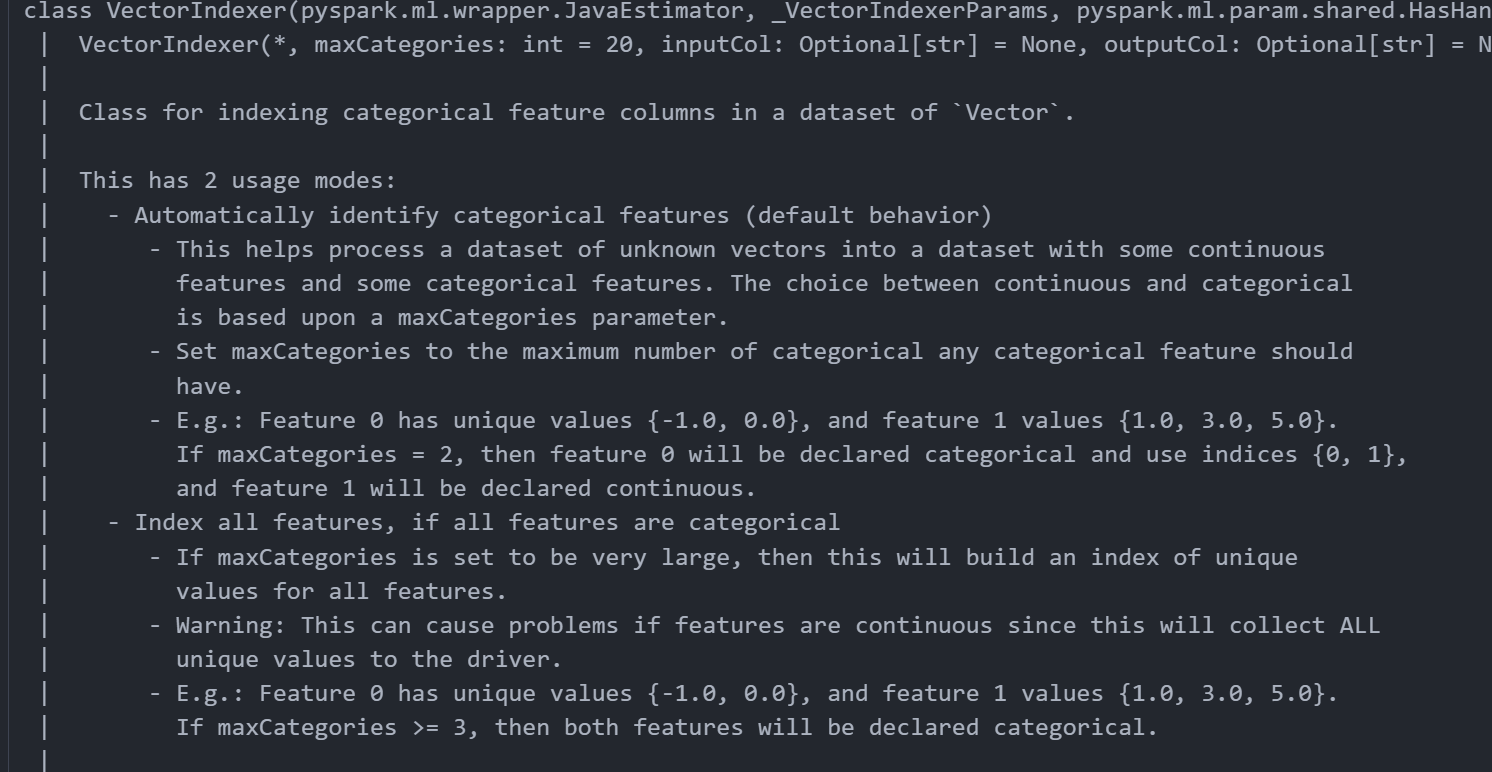

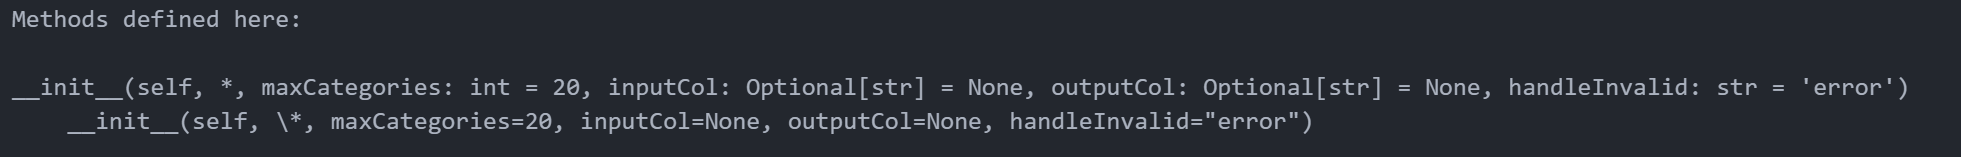

In [547]:
for col in output.columns:
    unique_values = output.select(col).distinct().count()
    print(f"Feature {col} has {unique_values} unique values")

Feature GRE Score has 50 unique values
Feature TOEFL Score has 30 unique values
Feature University Rating has 5 unique values
Feature SOP has 9 unique values
Feature LOR  has 9 unique values
Feature CGPA has 168 unique values
Feature Research has 2 unique values
Feature Chance of Admit has 60 unique values
Feature features has 400 unique values


In [548]:
vi = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=5).fit(output)
vi

VectorIndexerModel: uid=VectorIndexer_a53546e87786, numFeatures=7, handleInvalid=error

In [549]:
featureIndexer = vi.transform(output)
featureIndexer.show()

+---------+-----------+-----------------+---+----+----+--------+---------------+--------------------+--------------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit|            features|     indexedFeatures|
+---------+-----------+-----------------+---+----+----+--------+---------------+--------------------+--------------------+
|    337.0|      118.0|              4.0|4.5| 4.5|9.65|     1.0|           0.92|[337.0,118.0,4.0,...|[337.0,118.0,3.0,...|
|    324.0|      107.0|              4.0|4.0| 4.5|8.87|     1.0|           0.76|[324.0,107.0,4.0,...|[324.0,107.0,3.0,...|
|    316.0|      104.0|              3.0|3.0| 3.5| 8.0|     1.0|           0.72|[316.0,104.0,3.0,...|[316.0,104.0,2.0,...|
|    322.0|      110.0|              3.0|3.5| 2.5|8.67|     1.0|            0.8|[322.0,110.0,3.0,...|[322.0,110.0,2.0,...|
|    314.0|      103.0|              2.0|2.0| 3.0|8.21|     0.0|           0.65|[314.0,103.0,2.0,...|[314.0,103.0,1.0,...|
|    330.0|     

In [550]:
featureIndexer.select("indexedFeatures").toPandas().values

array([[DenseVector([337.0, 118.0, 3.0, 4.5, 4.5, 9.65, 1.0])],
       [DenseVector([324.0, 107.0, 3.0, 4.0, 4.5, 8.87, 1.0])],
       [DenseVector([316.0, 104.0, 2.0, 3.0, 3.5, 8.0, 1.0])],
       [DenseVector([322.0, 110.0, 2.0, 3.5, 2.5, 8.67, 1.0])],
       [DenseVector([314.0, 103.0, 1.0, 2.0, 3.0, 8.21, 0.0])],
       [DenseVector([330.0, 115.0, 4.0, 4.5, 3.0, 9.34, 1.0])],
       [DenseVector([321.0, 109.0, 2.0, 3.0, 4.0, 8.2, 1.0])],
       [DenseVector([308.0, 101.0, 1.0, 3.0, 4.0, 7.9, 0.0])],
       [DenseVector([302.0, 102.0, 0.0, 2.0, 1.5, 8.0, 0.0])],
       [DenseVector([316.7714, 108.0, 2.0, 3.5, 3.0, 8.6, 0.0])],
       [DenseVector([316.7714, 106.0, 2.0, 3.5, 4.0, 8.4, 1.0])],
       [DenseVector([327.0, 111.0, 3.0, 4.0, 4.5, 9.0, 1.0])],
       [DenseVector([328.0, 107.407, 3.0, 4.0, 4.5, 9.1, 1.0])],
       [DenseVector([307.0, 109.0, 2.0, 4.0, 3.0, 8.0, 1.0])],
       [DenseVector([311.0, 104.0, 2.0, 3.5, 2.0, 8.2, 1.0])],
       [DenseVector([314.0, 105.0, 2.0, 3.

In [551]:
new_indexed_data = featureIndexer.select("indexedFeatures", "Chance of Admit")
new_indexed_data.show()

+--------------------+---------------+
|     indexedFeatures|Chance of Admit|
+--------------------+---------------+
|[337.0,118.0,3.0,...|           0.92|
|[324.0,107.0,3.0,...|           0.76|
|[316.0,104.0,2.0,...|           0.72|
|[322.0,110.0,2.0,...|            0.8|
|[314.0,103.0,1.0,...|           0.65|
|[330.0,115.0,4.0,...|            0.9|
|[321.0,109.0,2.0,...|           0.75|
|[308.0,101.0,1.0,...|           0.68|
|[302.0,102.0,0.0,...|            0.5|
|[316.771362304687...|           0.45|
|[316.771362304687...|           0.52|
|[327.0,111.0,3.0,...|           0.84|
|[328.0,107.407035...|           0.78|
|[307.0,109.0,2.0,...|           0.62|
|[311.0,104.0,2.0,...|           0.61|
|[314.0,105.0,2.0,...|           0.54|
|[317.0,107.0,2.0,...|           0.66|
|[319.0,106.0,2.0,...|           0.65|
|[318.0,110.0,2.0,...|           0.63|
|[303.0,102.0,2.0,...|           0.62|
+--------------------+---------------+
only showing top 20 rows



In [552]:
training, test = new_indexed_data.randomSplit([0.75, 0.25])

In [553]:
training.count()

292

In [554]:
training.show()

+--------------------+---------------+
|     indexedFeatures|Chance of Admit|
+--------------------+---------------+
|[290.0,100.0,0.0,...|           0.47|
|[290.0,104.0,3.0,...|           0.45|
|[293.0,97.0,1.0,2...|           0.64|
|[294.0,95.0,0.0,1...|           0.49|
|[295.0,93.0,0.0,2...|           0.46|
|[295.0,96.0,1.0,1...|           0.47|
|[295.0,101.0,1.0,...|           0.69|
|[296.0,95.0,1.0,3...|           0.44|
|[296.0,97.0,1.0,1...|           0.49|
|[296.0,99.0,1.0,2...|           0.61|
|[296.0,101.0,0.0,...|            0.6|
|[297.0,96.0,1.0,2...|           0.43|
|[297.0,96.0,1.0,2...|           0.34|
|[297.0,98.0,1.0,2...|           0.59|
|[297.0,100.0,0.0,...|           0.52|
|[298.0,92.0,0.0,2...|           0.51|
|[298.0,98.0,1.0,1...|           0.44|
|[298.0,98.0,1.0,4...|           0.34|
|[298.0,99.0,1.0,4...|           0.46|
|[298.0,101.0,1.0,...|           0.54|
+--------------------+---------------+
only showing top 20 rows



In [555]:
test.count()

108

In [556]:
test.show()

+--------------------+---------------+
|     indexedFeatures|Chance of Admit|
+--------------------+---------------+
|[294.0,93.0,0.0,1...|           0.46|
|[295.0,99.0,1.0,2...|           0.57|
|[296.0,99.0,1.0,3...|           0.47|
|[298.0,99.0,0.0,1...|           0.53|
|[298.0,105.0,2.0,...|           0.69|
|[299.0,96.0,1.0,1...|           0.54|
|[299.0,100.0,0.0,...|           0.59|
|[300.0,102.0,2.0,...|           0.63|
|[300.0,105.0,0.0,...|           0.58|
|[301.0,99.0,1.0,3...|           0.64|
|[301.0,100.0,2.0,...|           0.67|
|[301.0,104.0,1.0,...|           0.68|
|[301.0,104.0,2.0,...|           0.68|
|[302.0,99.0,0.0,2...|           0.57|
|[303.0,99.0,2.0,2...|           0.36|
|[303.0,102.0,2.0,...|           0.62|
|[304.0,100.0,3.0,...|           0.42|
|[304.0,101.0,1.0,...|           0.38|
|[304.0,105.0,0.0,...|           0.52|
|[305.0,108.0,4.0,...|           0.61|
+--------------------+---------------+
only showing top 20 rows



In [557]:
# help(RandomForestRegressor)

In [558]:
random_forest_reg = RandomForestRegressor(featuresCol="features",labelCol="Chance of Admit", maxDepth=5, numTrees=100)

In [559]:
# Train model.  This also runs the indexer.
model = random_forest_reg.fit(train_df)

In [560]:
# help(model.transform)

In [561]:
# Make predictions.
predictions = model.transform(test_df)

In [562]:
predictions.show()

+--------------------+---------------+------------------+
|            features|Chance of Admit|        prediction|
+--------------------+---------------+------------------+
|[290.0,100.0,1.0,...|           0.47|0.5120650844908395|
|[298.0,98.0,2.0,4...|           0.34|0.5761038363996677|
|[298.0,99.0,1.0,1...|           0.53|0.5101023457289444|
|[299.0,100.0,1.0,...|           0.59|0.5358766417021282|
|[299.0,100.0,2.0,...|           0.68|0.5633116777473302|
|[299.0,100.0,3.0,...|           0.63|0.5640865626872639|
|[300.0,97.0,2.0,3...|           0.65|0.6009313621735624|
|[300.0,100.0,3.0,...|           0.64|0.6629430066440152|
|[300.0,100.0,3.0,...|           0.62|0.6489154639562336|
|[300.0,102.0,3.0,...|           0.63|0.6454860003030687|
|[301.0,97.0,2.0,3...|           0.44| 0.556417879460476|
|[301.0,107.0,3.0,...|           0.62|0.6751494255386997|
|[302.0,99.0,1.0,2...|           0.57|0.4877015738269034|
|[302.0,102.0,1.0,...|            0.5|0.5704433541199129|
|[304.0,97.0,2

In [563]:
evaluator = RegressionEvaluator(labelCol="Chance of Admit", predictionCol="prediction", metricName="rmse")
print ("Root Mean Squared Error (RMSE) on test data = ",evaluator.evaluate(predictions))

Root Mean Squared Error (RMSE) on test data =  0.0679207127850079


In [564]:
evaluator = RegressionEvaluator(labelCol="Chance of Admit", predictionCol="prediction", metricName="r2")
print("R Squared (R2) on test data =", evaluator.evaluate(predictions))

R Squared (R2) on test data = 0.7837979805773387


---

In [565]:
random_forest_reg = RandomForestRegressor(featuresCol="indexedFeatures",labelCol="Chance of Admit", maxDepth=5, numTrees=100)

In [566]:
# Train model.  This also runs the indexer.
model = random_forest_reg.fit(training)

In [567]:
# Make predictions.
predictions = model.transform(test)

In [568]:
predictions.show()

+--------------------+---------------+------------------+
|     indexedFeatures|Chance of Admit|        prediction|
+--------------------+---------------+------------------+
|[294.0,93.0,0.0,1...|           0.46|0.4624708570116596|
|[295.0,99.0,1.0,2...|           0.57|0.5204775070582908|
|[296.0,99.0,1.0,3...|           0.47|0.5146760704859638|
|[298.0,99.0,0.0,1...|           0.53|0.5200461913294759|
|[298.0,105.0,2.0,...|           0.69| 0.644905399984525|
|[299.0,96.0,1.0,1...|           0.54|0.4954163814141037|
|[299.0,100.0,0.0,...|           0.59|0.5422583945610766|
|[300.0,102.0,2.0,...|           0.63|0.6218851896244039|
|[300.0,105.0,0.0,...|           0.58|0.5569522318634973|
|[301.0,99.0,1.0,3...|           0.64| 0.567359535042627|
|[301.0,100.0,2.0,...|           0.67|0.6062516684255164|
|[301.0,104.0,1.0,...|           0.68|0.5875582767322649|
|[301.0,104.0,2.0,...|           0.68|0.6421028776791847|
|[302.0,99.0,0.0,2...|           0.57|0.5144054894520049|
|[303.0,99.0,2

In [569]:
evaluator = RegressionEvaluator(labelCol="Chance of Admit", predictionCol="prediction", metricName="rmse")
print ("Root Mean Squared Error (RMSE) on test data = ",evaluator.evaluate(predictions))

Root Mean Squared Error (RMSE) on test data =  0.06274252495996646


In [570]:
evaluator = RegressionEvaluator(labelCol="Chance of Admit", predictionCol="prediction", metricName="r2")
print("R Squared (R2) on test data =", evaluator.evaluate(predictions))

R Squared (R2) on test data = 0.8039148588611241
